In [ ]:
import sqlglot

# Parse and validate Snowflake SQL
try:
    parsed = sqlglot.parse_one("EXPLAIN select  * FROM my_table", dialect="snowflake")
except sqlglot.errors.ParseError as e:
    print(f"✗ Syntax error: {e}")

'EXPLAIN select  * FROM my_table' contains unsupported syntax. Falling back to parsing as a 'Command'.


In [ ]:
pip install sqlglot

Note: you may need to restart the kernel to use updated packages.


IAA

improving rubric

In the context of error analysis, a rubric is a tool used for assessing and categorizing errors, often in language learning or writing. It provides a set of criteria that outlines different types of errors, such as grammatical, lexical, or syntactic mistakes. By using a rubric, educators and learners can systematically identify and analyze errors, providing a structured way to give feedback and improve skills. It's like a roadmap for understanding where and why mistakes are happening, aiding in targeted learning. Would you like to know more about how to create or use such rubrics?

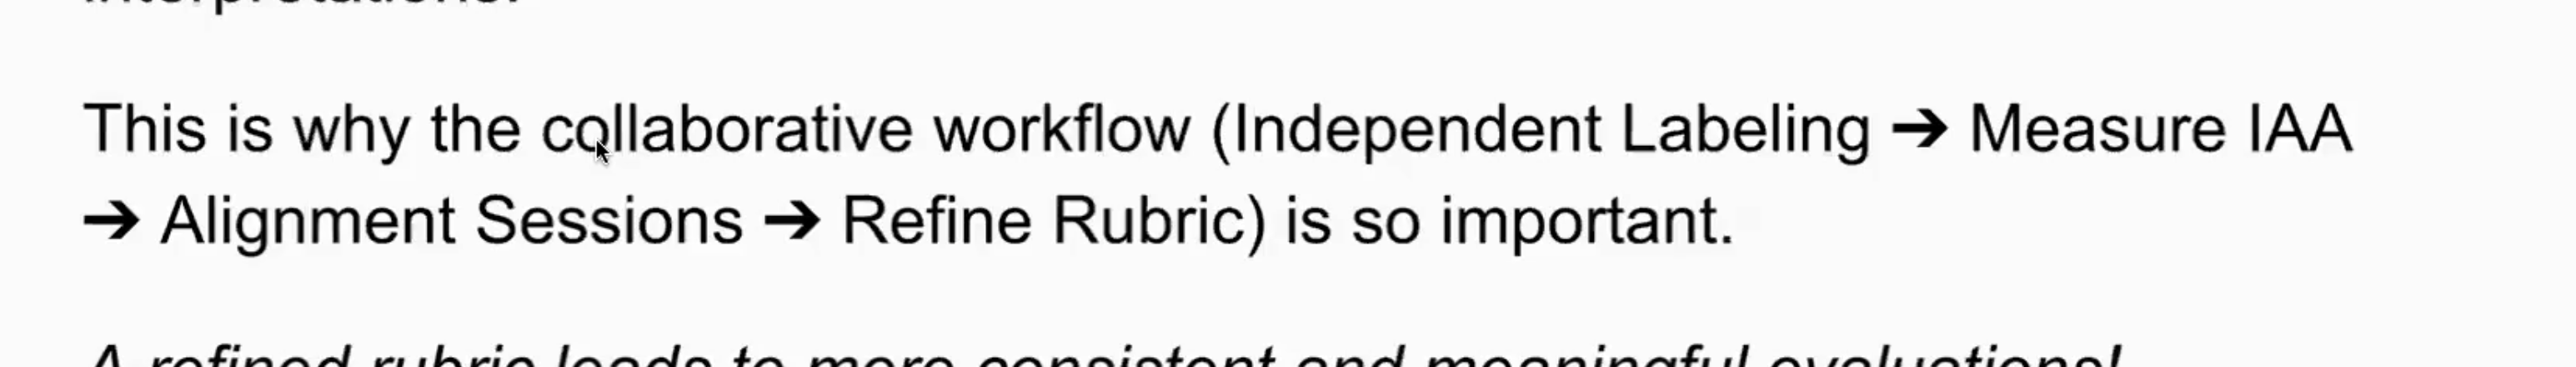

traces

Example Tuples:
(Simple, Beginner, Specific)

→ "Show me all customers from California"
(Complex, Expert, Ambiguous)

→ "I need performance metrics across regions with some kind of trending analysis"

(Multi-table, Beginner, Contradictory)
→ "Get me sales data but don't include any sales information, just the customer details and product info"

(Complex, Intermediate, Specific)
→ "Calculate the rolling 3-month average revenue by product category, excluding returns"

(Simple, Expert, Ambiguous)
→ "Pull the usual quarterly numbers"

No, dimensions and tuples are different according to the document:
Dimension = A category that represents "one axis of variation"

Examples: Feature, Client Persona, Scenario Type

Tuple = A specific combination of values, one from each dimension

Example: (Property Search, Investor, Ambiguous)

The Relationship:

Dimensions are the categories/axes you define
Tuples are specific combinations you create by picking one value from each dimension

From the document:

"A dimension is a way to categorize different parts of a user query. Each dimension represents one axis of variation."


"A tuple is a specific combination of values—one from each dimension—that defines a particular use case."

Think of dimensions as the column headers in a table, and tuples as specific rows with values filled in for each column.

# rubric

A rubric is a set of criteria and definitions used to evaluate LLM outputs consistently.
From the document, rubrics include:

Clear definitions of what constitutes Pass/Fail
Specific examples illustrating each category
Decision rules for edge cases

Example rubric element:

Criterion: "Tone appropriateness for client persona"
Pass: Email tone aligns with luxury buyer expectations (formal, professional)
Fail: Uses slang or casual language inappropriate for persona

Rubrics get refined through collaborative annotation sessions to ensure multiple evaluators apply them consistently. They serve as specifications for both human annotators and LLM-as-Judge prompts.

Variance in queries. 

week 2 # (after collab)

## Ariel Fogel
1. How do you leverage LLMs to map out failure modes when bootstrapping synthetic datasets?
2. How do I know how much output or how many different kinds of output threads I should have?

## Tomás L.
3. What is a rubric? (seeking definition)
4. What happens if you don't change the rubric levels in your dev set?

## Andrei Bocan  
5. How are you thinking about evals for tool use and MCP?
6. What does the test harness for those things look like?

## Hong Xu
7. What if my end users' prompts are ambiguous - how to deal with that?

## Shrirang Moghe
8. What did you mean about gathering labels first otherwise you get biased?
9. Should we use different rubrics for different user personas (technical buyer, initiative owner, VP)?

## Pastor Soto
10. How do you define a good first rubric iteration when you're not the target user (e.g., education bot owner evaluating student interactions)?

## Rodo Yabut
11. Is there any difference between doing evals for search versus other examples?
12. Where can I find materials on search-related evals in the coursework?

## Qasim
13. How do we handle evals for broadly scoped applications where context varies widely?
14. Do we need to do evaluation for every single customer we onboard?
15. What do you mean by simulations - having an LLM simulate entire user conversations?

## Wayde Gilliam
16. For complex retrieval issues, should we work holistically or create mini-projects focusing just on retrieval?
17. When fixing retrieval, should you focus just on retrieval or look at holistic traces?

## Akshobhya Dahal
18. How do you handle multi-agent workflows with multiple LLMs and system prompts - do error analysis on each node?
19. For retrieval with 20k+ documents that fails around 1,000, do you have evaluation metrics for chunking strategies?

## Zee
20. Are there different practices for evals when products output structured data rather than raw text?
21. How do you incorporate A/B test results into validating eval predictiveness?

## Aditya Kabra
22. How much should we optimize prompts before validating product need with users (lean startup approach)?
23. Can AI become a domain expert through prompt refinement and co-working?

## Sebi Lozano
24. Should proactiveness be measured at turn level or session level?
25. Why weekly realignment for auto evaluators versus monthly/quarterly?

## Peter Cardwell
26. As a solo developer, what should I anticipate when onboarding a domain expert later and changing rubrics midstream?

## Stefan Drakulich
27. Are referential problems ("you did this") intractable, and should you keep things super clean?
28. How do you handle building architecture and prompt pipelines in parallel when they're interdependent?

**Total: 28 questions from 14 participants**

![pasted_image_ca1ec4c1-403a-45cb-acfc-e18ac1ff1737.png](attachment:ca1ec4c1-403a-45cb-acfc-e18ac1ff1737)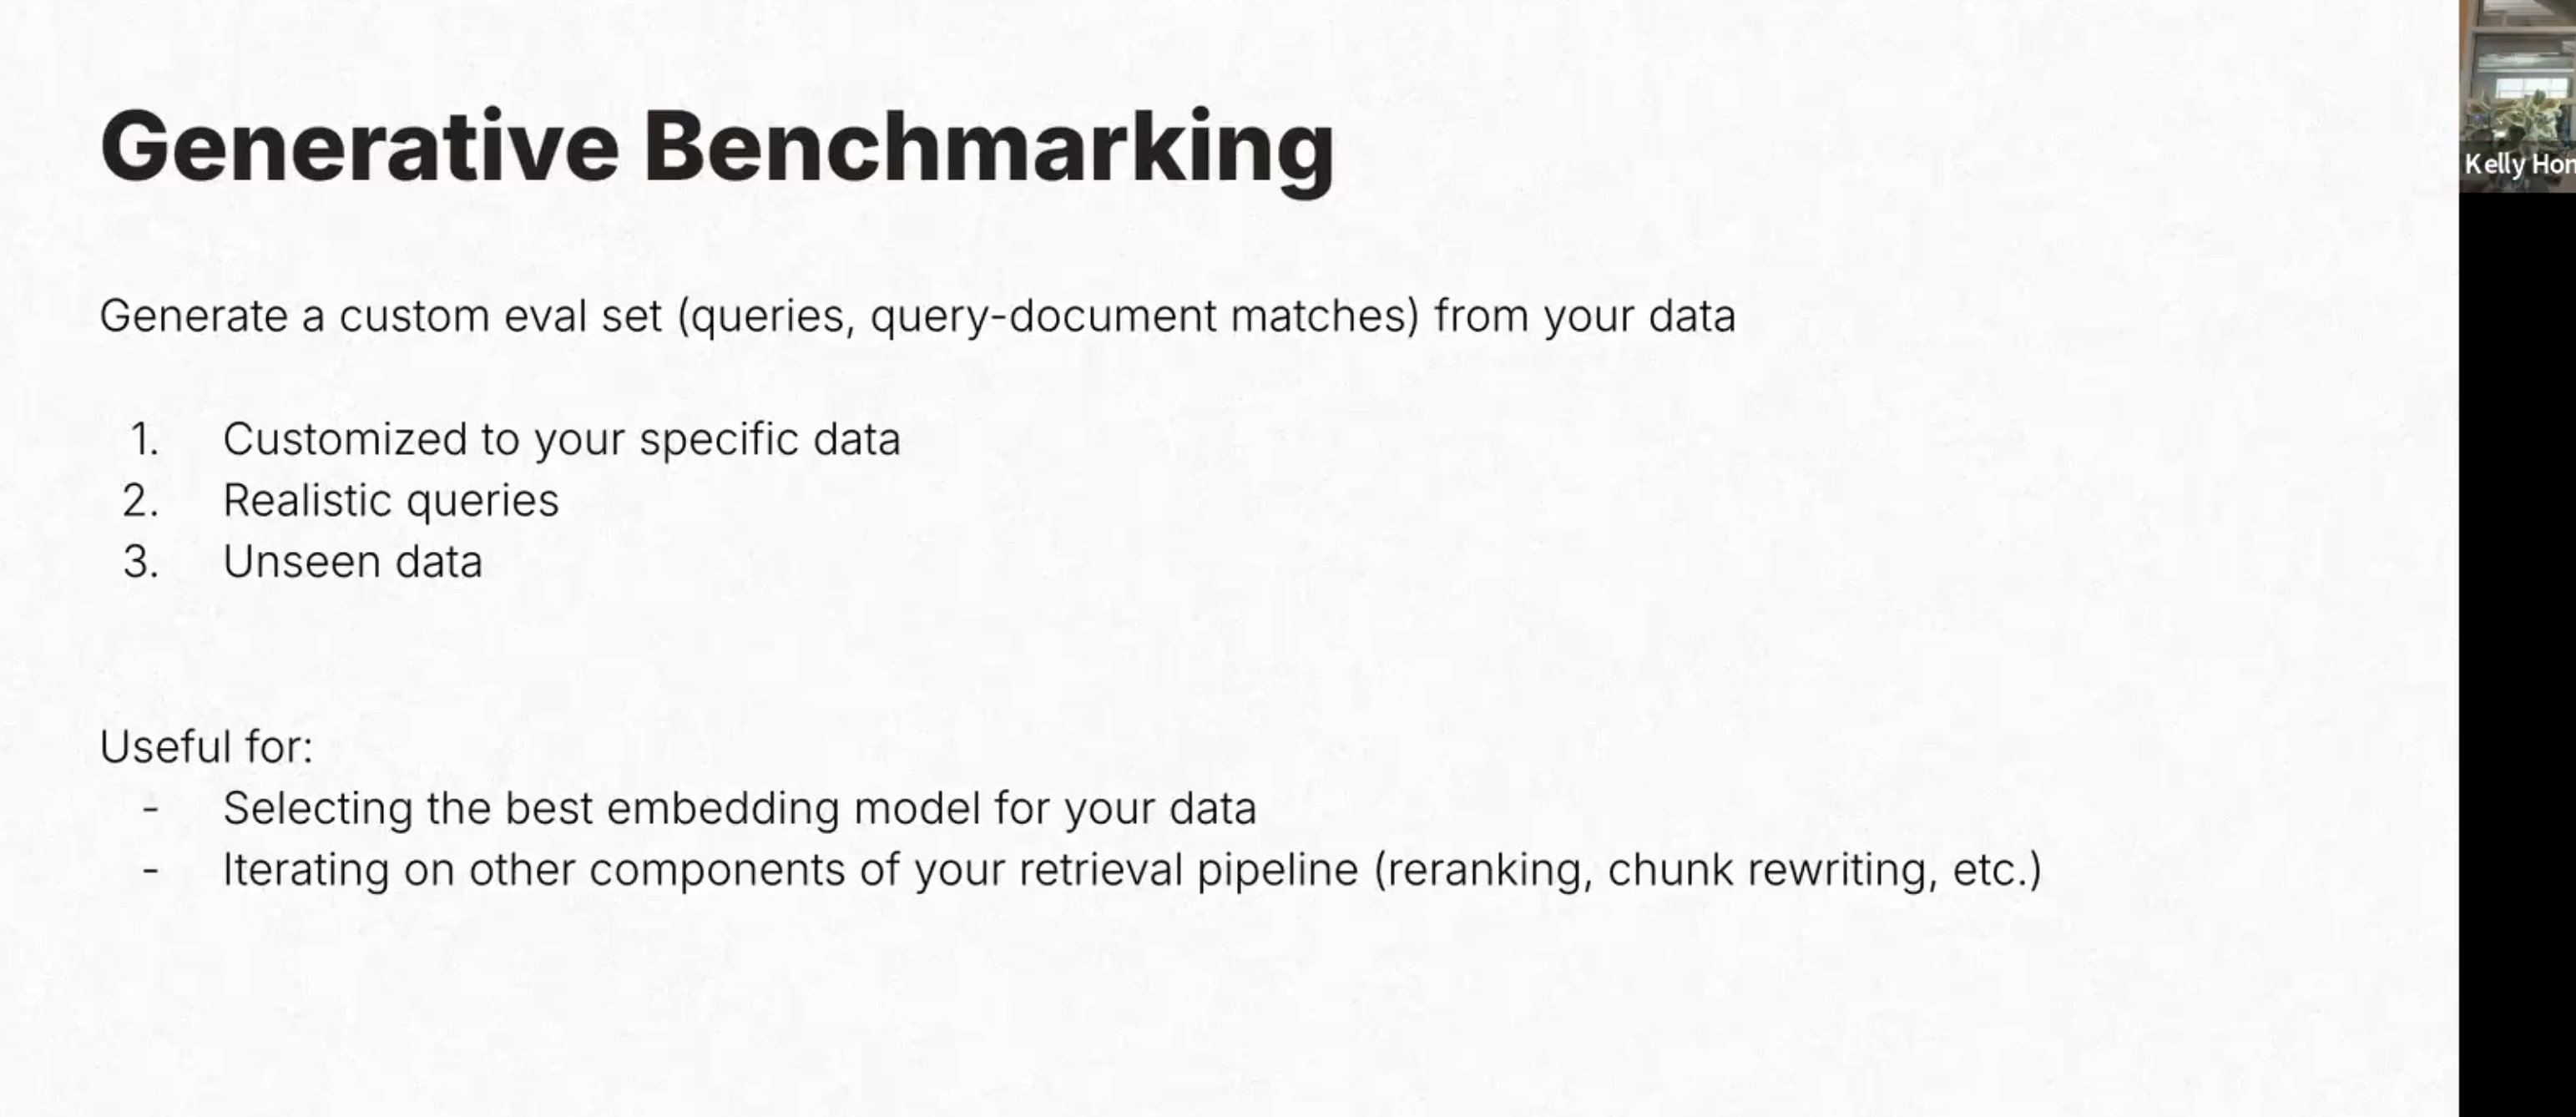

# Generative Benchmarking: Mental Model

## The Core Problem
RAG systems break but you can't tell if it's bad retrieval or bad generation. To test retrieval, you need query-document pairs - but you only have documents.

## The Solution: Generate the Missing Queries
**Two-step process:**
1. **Filter chunks** - Use aligned LLM judge to keep only chunks users would actually query
2. **Generate queries** - Create realistic user queries from those chunks

## The Key Insight
Public benchmarks (like MTEB) often contradict real-world performance. Your data is different, so you need custom evaluation.

## Memory Hook: "Invert Your Data"
Instead of going query → document (normal search), go document → query (generation), then test if you can retrieve the original document.

## Critical Success Factor
**Alignment** - The LLM judge must think like your domain expert, not make random decisions. Requires human-labeled examples and iteration.

## Bottom Line
Creates evaluation that actually matches your users and use case, enabling systematic improvement of retrieval components.

**Case study proof**: Weights & Biases found their chosen embedding model was actually the worst performer when tested on their real data.

#2  office hours

Here are all the questions asked during office hours:

**Pastor Soto:**
- How do you introduce evals to clients who want chatbots?
- How do you make evals useful beyond a shiny demo?
- How do you estimate time for eval implementation?

**Ben Wise:**
- How do I evaluate coherence between user briefs and retrieved patterns in my content ghostwriter AI?
- Is this the same as standard eval techniques or different for retrieval systems?

**Shrirang Moghe:**
- Can you explain Para's approach of building prompts from evals rather than caring about prompts?

**Xiangyi Li:**
- What are your thoughts on the "why eval startups fail" article?
- How do you view the statements about eval startups being destined to fail?

**Robert Ta:**
- How do you handle evals for hyper-personalized AI systems (health/longevity)?
- How do you separate agent correctness evals from product metrics?
- How do you handle cross-app memory where AI remembers actions across applications?

**Uday N:**
- How do you evaluate search performance when you can't access customer data due to legal restrictions?
- How do you determine if users get the right documents when searching?

**Robb Winkle:**
- How should you structure datasets for multi-step processes with multiple LLM calls?
- What's the best way to maintain data for error analysis with complex traces starting from database IDs?

**Community:**
- Can we create a Discord channel for meetups? (Robert Ta)